<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/MTCNN_ResNet_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.9 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from matplotlib import pyplot as plt
from mtcnn import MTCNN

In [5]:
filename='/content/drive/MyDrive/Colab Notebooks/nhandien.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

3/3 [==============================] - 0s 35ms/step
{'box': [1672, 1115, 739, 935], 'confidence': 0.9999973177909851, 'keypoints': {'left_eye': (1795, 1480), 'right_eye': (2112, 1469), 'nose': (1882, 1661), 'mouth_left': (1829, 1846), 'mouth_right': (2090, 1853)}}
{'box': [1195, 569, 248, 324], 'confidence': 0.999995768070221, 'keypoints': {'left_eye': (1282, 690), 'right_eye': (1395, 699), 'nose': (1353, 761), 'mouth_left': (1281, 812), 'mouth_right': (1385, 818)}}
{'box': [2003, 456, 416, 506], 'confidence': 0.999994695186615, 'keypoints': {'left_eye': (2103, 661), 'right_eye': (2291, 633), 'nose': (2202, 735), 'mouth_left': (2122, 828), 'mouth_right': (2328, 798)}}
{'box': [1812, 109, 269, 345], 'confidence': 0.9999846816062927, 'keypoints': {'left_eye': (1885, 253), 'right_eye': (2008, 246), 'nose': (1946, 323), 'mouth_left': (1884, 366), 'mouth_right': (2011, 361)}}
{'box': [1004, 1014, 410, 554], 'confidence': 0.9999470114707947, 'keypoints': {'left_eye': (1102, 1225), 'right_eye

12/12 [==============================] - 1s 69ms/step


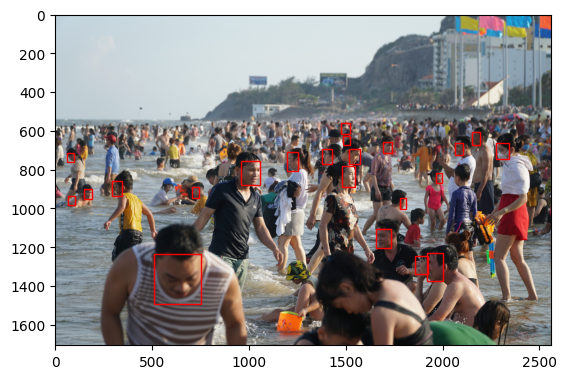

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
from mtcnn import MTCNN
from matplotlib.patches import Rectangle

filename = '/content/drive/MyDrive/Colab Notebooks/anhnhieunguoi.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)

plt.imshow(img)
ax = plt.gca()
for face in faces:
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.show()

In [7]:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/AnhDaNhanDien.jpg')

<Figure size 640x480 with 0 Axes>

In [8]:
for Key,value in face ['keypoints'].items():
  dot = plt.Circle(value,radius=2,color ='red')
  ax.add_patch(dot)
plt.show()

2/2 [==============================] - 0s 27ms/step


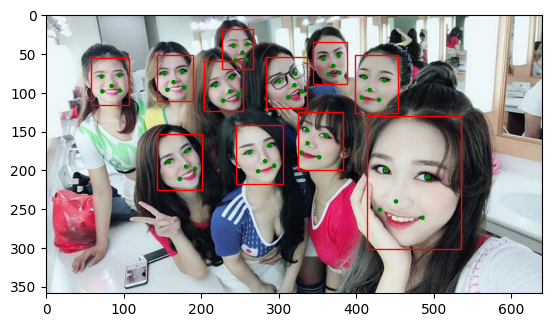

In [9]:
from PIL import Image
from matplotlib import pyplot as plt
from mtcnn import MTCNN
from matplotlib.patches import Rectangle

filename = '/content/drive/MyDrive/Colab Notebooks/hot-girl-ngu-gat1.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)

plt.imshow(img)
ax = plt.gca()
for face in faces:
    #hcn
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    #tròn
    for Key,value in face ['keypoints'].items():
      dot = plt.Circle(value,radius=2,color ='green')
      ax.add_patch(dot)
plt.show()

In [10]:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MTCNN_AnhDaSuDung/AnhDaNhanDien1.jpg')

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 208ms/step


2/2 [==============================] - 0s 47ms/step


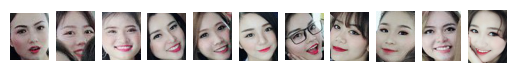

In [11]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    
  plt.show()
filename = '/content/drive/MyDrive/Colab Notebooks/hot-girl-ngu-gat1.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

In [12]:
import cv2
import os
# Tạo thư mục mới để lưu các tấm hình
output_folder = '/content/drive/MyDrive/Colab Notebooks/HinhDaCatRa'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lưu các tấm hình đã cắt vào thư mục mới
for i, result in enumerate(faces):
    x1, y1, width, height = result['box']
    x2, y2 = x1 + width, y1 + height
    CatMat = img[y1:y2, x1:x2]
    cv2.imwrite(os.path.join(output_folder, f'Anh_Da_Cat_{i}.jpg'), CatMat) 

In [13]:
#VGG 16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/Colab Notebooks/conzoi.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 903ms/step


In [21]:
#ResNet
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/Colab Notebooks/5conmeo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225)\n, (u'n01871265', u'tusker', 0.1122357)\n, (u'n02504458', u'African_elephant', 0.061040461)\n]

1/1 [==============================] - 1s 1s/step
Predicted:
 [('n02137549', 'mongoose', 0.39699188), ('n02441942', 'weasel', 0.37209135), ('n02444819', 'otter', 0.05772373), ('n02442845', 'mink', 0.030625606), ('n02138441', 'meerkat', 0.021004254)]
